In [35]:
import pandas as pd
import numpy as np
import yfinance as yf
import math

In [34]:
import matplotlib.pyplot as plt

In [33]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error,mean_absolute_error



In [32]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [36]:
file=yf.download("AAPL",start="2010-01-01",end="2020-12-31")

[*********************100%***********************]  1 of 1 completed


In [37]:
file.shape

(2768, 6)

In [38]:
close=pd.DataFrame(file["Close"])

In [39]:
close.mean()

Close    33.741802
dtype: float64

In [40]:
close

,Close
Date,
2010-01-04,7.643214
2010-01-05,7.656429
2010-01-06,7.534643
2010-01-07,7.520714
2010-01-08,7.570714
...,...
2020-12-23,130.960007
2020-12-24,131.970001
2020-12-28,136.690002


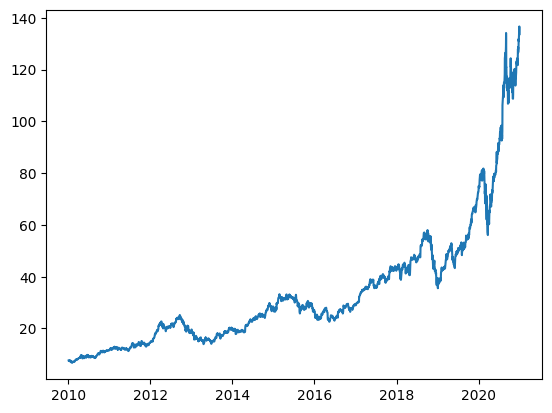

In [41]:
plt.plot(np.array(close.index),np.array(close["Close"]))

In [42]:
length=int(len(close)*0.9)

In [43]:
training_data=list(close[:length]["Close"])
testing_data=list(close[length:]["Close"])

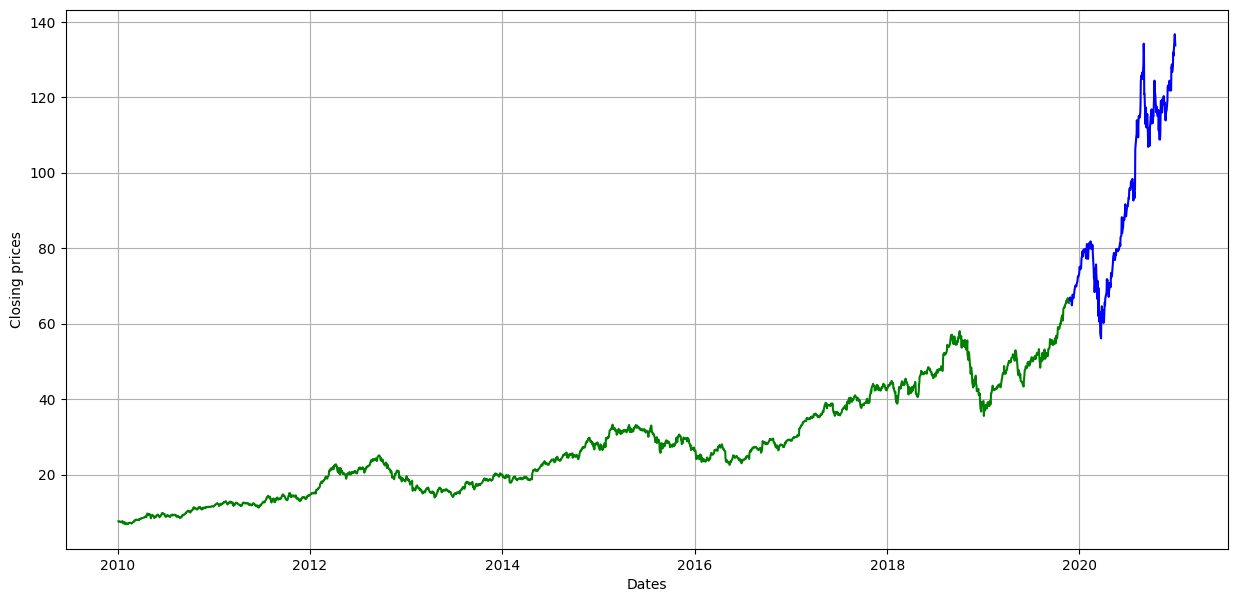

In [44]:
plt.figure(figsize=(15,7))
plt.grid(True)
plt.xlabel("Dates")
plt.ylabel("Closing prices")
plt.plot(close[:length]["Close"],"green",label="Train data")
plt.plot(close[length:]["Close"],"b",label="Test Data")

In [45]:
n_test=len(testing_data)
model_predictions=[]

In [46]:
import statsmodels.api as sm
for i in range(n_test):
  model = sm.tsa.ARIMA(training_data, order=(4,1,0))
  model_fit=model.fit()
  output=model_fit.forecast()
  yhat=output[0]
  model_predictions.append(yhat)
  actual=testing_data[i]
  training_data.append(actual)

In [47]:
import pickle
file=open("stock_price.pkl","wb")
pickle.dump(model,file)

In [48]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2767
Model:                 ARIMA(4, 1, 0)   Log Likelihood               -3649.104
Date:                Tue, 15 Aug 2023   AIC                           7308.207
Time:                        13:58:49   BIC                           7337.833
Sample:                             0   HQIC                          7318.908
                               - 2767                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1204      0.007    -17.685      0.000      -0.134      -0.107
ar.L2          0.0330      0.006      5.801      0.000       0.022       0.044
ar.L3         -0.0076      0.007     -1.058      0.2

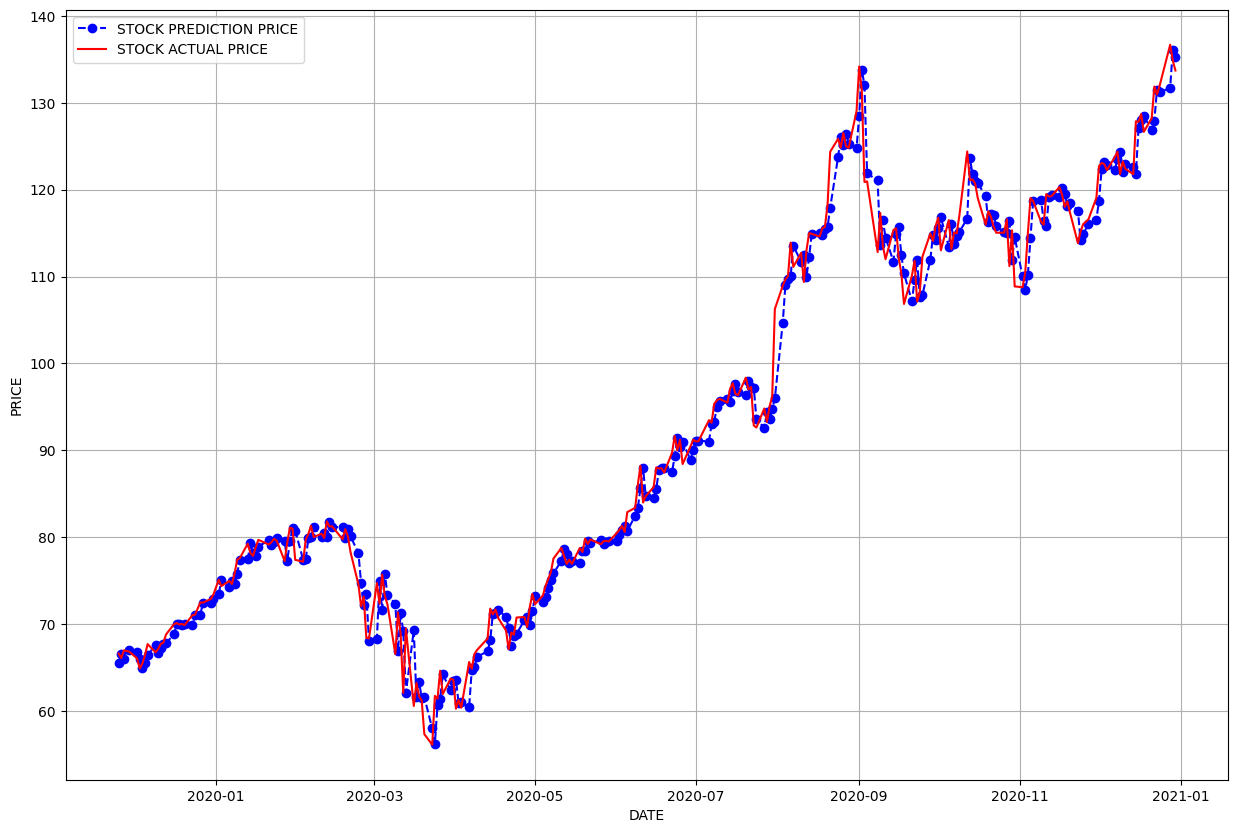

In [49]:
plt.figure(figsize=(15,10))
plt.grid(1)
date_range=np.array(close[length:].index)
plt.plot(date_range,np.array(model_predictions),"b",marker="o",linestyle="dashed",label="STOCK PREDICTION PRICE")
plt.plot(date_range,np.array(testing_data),"r",label="STOCK ACTUAL PRICE")
plt.xlabel("DATE")
plt.ylabel("PRICE")
plt.legend()
plt.show()

In [50]:
MSE=np.mean(np.abs(np.array(model_predictions)-np.array(testing_data))/np.abs(testing_data))

In [51]:
100-MSE

99.98050760008202